# Building a YOLOv3 Object Detector with Darknet in the Cloud (GPU ENABLED)

This notebook is based on this [tutorial](https://colab.research.google.com/drive/1Mh2HP_Mfxoao6qNFbhfV3u28tG8jAVGk) from this [YouTube video](https://www.youtube.com/watch?v=10joRJt39Ns&feature=emb_logo).

# Cloning and Building Darknet
* Clone darknet from AlexeyAB's repo, 
* Adjust the Makefile to enable OPENCV and GPU for darknet 
* Build darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14549 (delta 8), reused 14 (delta 6), pack-reused 14522
Receiving objects: 100% (14549/14549), 13.23 MiB | 20.13 MiB/s, done.
Resolving deltas: 100% (9889/9889), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-12-02 15:54:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   460KB/s    in 8m 44s  

2020-12-02 16:03:20 (462 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:

# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

# Uploading Google Drive Files to Use
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

In [ ]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
# %cd ..
# upload()

### Google Drive
Images can also be uploaded from your Google Drive and easily have detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv3 with images from Google Drive using the darknet command:
```
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```
I recommend saving images within a folder called 'images' at the root level of your Google Drive.

In [ ]:
pwd

In [ ]:
# %cd ..
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'All Cohen Lab Stuff'			 Metis
'Colab Notebooks'			'My Drive'
'Data science specialization Coursera'	'Personal stuff'
 Documents				 YOLO_FIRST_training_weighs
 Images					 yolov3
'Jobs stuff'


In [ ]:
!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_CUSTOM.cfg


In [ ]:
pwd

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/Images/detection1.jpg

# Training a Custom YOLOv3 Object Detector in the Cloud

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


# Gathering and Labeling a Custom Dataset
In order to create a custom object detector you need a good dataset of images and labels so that the detector can be efficiently trained to detect objects.

This can be done in two ways. through  or through using Google images or creating your own dataset and using an annotation tool to manually draw labels. **(I recommend the first way!)**

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_CUSTOM.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/844barnbarnacles-IMG_1169.jpg  
  inflating: data/__MACOSX/obj/._844barnbarnacles-IMG_1169.jpg  
  inflating: data/obj/85nudiimages(9).jpg  
  inflating: data/__MACOSX/obj/._85nudiimages(9).jpg  
  inflating: data/obj/633nudiimages(159).jpg  
  inflating: data/__MACOSX/obj/._633nudiimages(159).jpg  
  inflating: data/obj/73NEWtrainmussels.png  
  inflating: data/__MACOSX/obj/._73NEWtrainmussels.png  
  inflating: data/obj/133NEWtrainHigginsEyeWithZebraMusselsByUSFWS.txt  
  inflating: data/obj/93NEW_NEW_trainimages(65).txt  
  inflating: data/obj/87NEW_NEW_trainimage(11).txt  
  inflating: data/obj/738nudiimage(22).txt  
  inflating: data/obj/6NEW_NEW_trainimages(29).txt  
  inflating: data/obj/65anemimages(89).txt  
  inflating: data/obj/803crabimage(8).txt  
  inflating: data/obj/776anemunnamed(14).txt  
  inflating: data/obj/626nudi4441.jpg  
  inflating: data/__MACOSX/obj/._626nudi4441.jpg  
  inflating: data/obj/100

# Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.

I have a detailed video on how to properly configure all four of these files to train a custom yolov3 detector. I will spare the time and ask you to watch the video in order to properly learn how to prepare the files.

You can access the video with this link! [Configuring YOLOv3 Files for Training](https://www.youtube.com/watch?v=zJDUhGL26iU&t=300s)

## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
pwd

In [ ]:
# download cfg to google drive and change its name
# !cp /darknet/cfg/yolov3.cfg /mydrive/yolov3/yolov3_CUSTOM.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
# download('darknet/cfg/yolov3.cfg')

In [ ]:
pwd

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_CUSTOM.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
# %cd cfg
# upload()
# %cd .. 

## ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

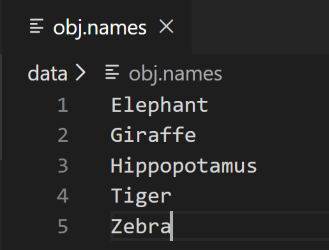

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

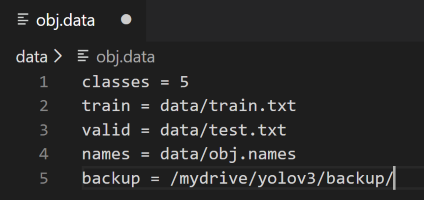



In [ ]:
# should be in darknet
!pwd

In [ ]:
cd darknet/

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

Luckily I have created a script that I showed in a past video that generates train.txt for us.

The script can be accessed from this [Github Repo](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

Should be in /content

In [ ]:
cd ..

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

Run this cell in /content

In [ ]:
pwd

In [ ]:
!python generate_train.py

In [ ]:
!cp /content/data/train.txt ./data/

cp: cannot stat '/content/data/train.txt': No such file or directory


Transfer into Darknet

In [ ]:
# cd /darknet

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
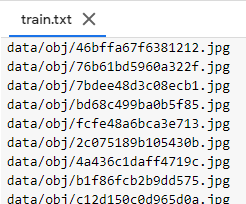

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-12-02 16:06:57--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M   468KB/s    in 5m 47s  

2020-12-02 16:12:45 (457 KB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv3 object detector on whatever crazy classes you have decided on. So run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

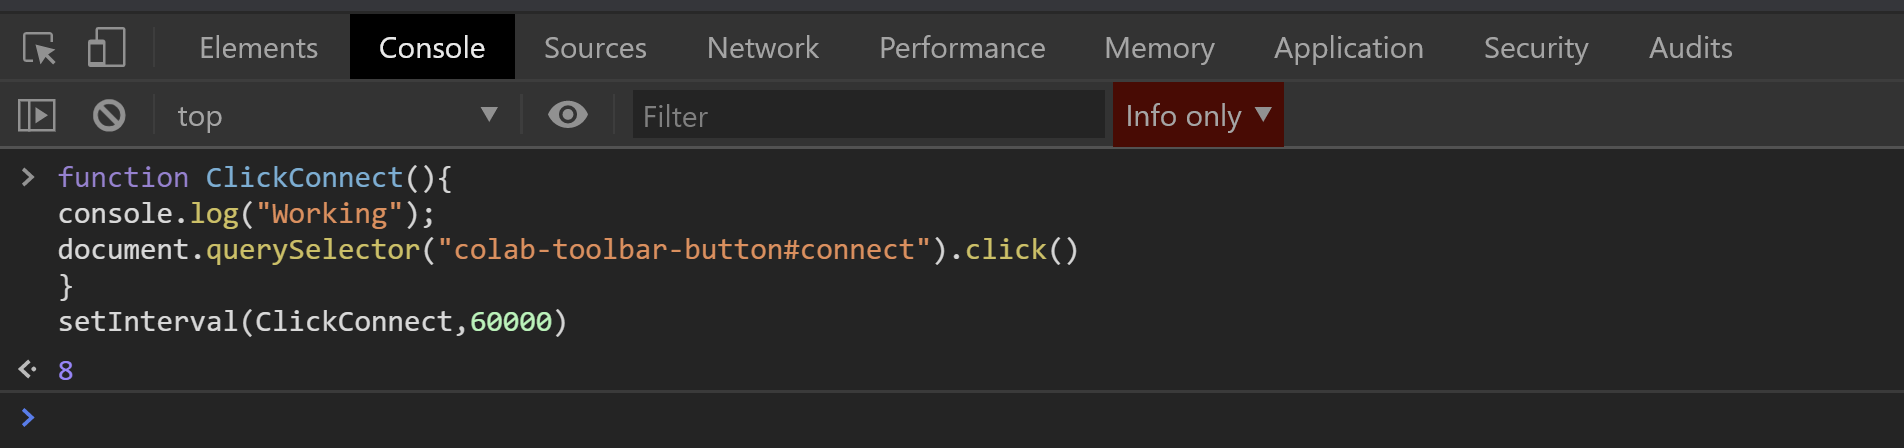

In [ ]:
# !cp mydrive/yolov3/yolov3_CUSTOM.cfg darknet/cfg/yolov3_CUSTOM.cfg


# !cp darknet/cfg/yolov3.cfg drive/MyDrive/yolov3/yolov3_CUSTOM.cfg

In [ ]:
pwd

In [ ]:
# train your custom detector
# !./darknet detector train data/obj.data cfg/yolov3_CUSTOM.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
cd darknet

In [ ]:
# !./darknet detector train data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights -dont_show

In [ ]:
# !./darknet detector train data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights -dont_show

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, total_loss = 0.005060 
 total_bbox = 142108, rewritten_bbox = 0.173811 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.829426), count: 3, total_loss = 0.485671 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.841341), count: 3, total_loss = 0.047675 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, total_loss = 0.000042 
 total_bbox = 142114, rewritten_bbox = 0.173804 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.876460), count: 18, total_loss = 0.379782 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.842622), count: 7, total_loss = 0.286493 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1

# Test Your Custom Object Detector
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_CUSTOM.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_CUSTOM.cfg
%cd ..


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights /mydrive/Images/anemone_test.jpeg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights /mydrive/Images/PPS17.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_CUSTOM.cfg /mydrive/yolov3/backup/yolov3_CUSTOM_last.weights /mydrive/Images/barnacle_test_2.jpeg -thresh 0.1
imShow('predictions.jpg')
